## Explore the noble gas data collected on OSNAP 2016

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("darkgrid")

In [6]:
# load in the IGF data

fname = '/Users/beaird/Google Drive/data/greenland/cruise_data/2016/OSNAP/IGF_analysis/NLB3_Final.xlsx'


data = pd.read_excel( fname, sheet_name=0, header= [0,1] ) 

# Now let's drop the second level that contains the units
data.columns = data.columns.droplevel(1)

# lets replace the annoying parenthesis in the column headers
data.columns = data.columns.str.replace("[()]", "")

# drop bad rows
data.dropna(  subset=['stacast'], inplace=True)

print(data.info())
data.tail()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 97 entries, 15.0 to 280.0
Data columns (total 29 columns):
stacast          97 non-null float64
bottle           97 non-null float64
pressure         97 non-null float64
temperature      97 non-null float64
salinity         97 non-null float64
duplicate        97 non-null float64
samplename       97 non-null object
Del3He           97 non-null float64
CHe              97 non-null float64
CNe              97 non-null float64
CAr              97 non-null float64
CKr              97 non-null float64
CXe              97 non-null float64
samplecomment    34 non-null object
delHe            97 non-null float64
delNe            97 non-null float64
delAr            97 non-null float64
delKr            97 non-null float64
delXe            97 non-null float64
ddHe             11 non-null float64
ddNe             11 non-null float64
ddAr             11 non-null float64
ddKr             11 non-null float64
ddXe             11 non-null float64
dCH

station,stacast,bottle,pressure,temperature,salinity,duplicate,samplename,Del3He,CHe,CNe,...,ddHe,ddNe,ddAr,ddKr,ddXe,dCHe,dCNe,dCAr,dCKr,dCXe
280.0,1.0,1.0,87.499,3.5537,33.3949,0.0,CW20170419105603,-2.676,1.874581e-09,8.149616e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280.0,1.0,2.0,50.673,4.4908,32.9403,0.0,CW20170419105605,-2.841,1.875762e-09,8.131260e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280.0,1.0,2.0,50.673,4.4908,32.9403,0.0,CW20170419105605,-1.337,1.815789e-09,7.879061e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280.0,1.0,3.0,30.518,4.4910,32.5813,0.0,CW20170315104406,-2.039,1.874850e-09,8.143625e-09,...,0.384179,0.222562,0.327719,-0.215916,0.13394,6.900001e-12,1.755018e-11,5.108800e-08,8.135049e-12,7.524161e-13
280.0,1.0,3.0,30.518,4.4910,32.5813,1.0,CW20170606105003,-1.951,1.867950e-09,8.126074e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


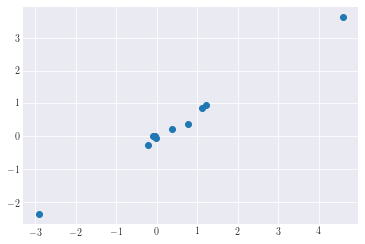

In [40]:
# lets also load and add the NG data from the other sites to be able to compare

# load in the Sermilik data
fname = '/Users/beaird/Google Drive/data/greenland/cruise_data/2015/SERM2015/noble_gas_data/NLB2_Data_remove3bad.xlsx'
SERMdata = pd.read_excel( fname, sheet_name=0 ) 

# lets replace the annoying parenthesis in the column headers
SERMdata.columns = SERMdata.columns.str.replace("[()]", "")



#  now let's load in the data from Atasund
fname = '/Users/beaird/Google Drive/data/greenland/cruise_data/2014/DISKO/OMPA/Data.xlsx' 
WGdata = pd.read_excel(fname)

# remove parenth:
WGdata.columns = WGdata.columns.str.replace("[()]", "")

WGdata.head()

,station,pressure,temperature,salinity,bottle,dup,Del3He,CHe,CNe,CAr,CKr,CXe
0,3,151.64,1.9888,33.643,1,0,-2.706823,4.222341e-08,1.838919e-07,0.000373,9.091579e-08,1.371027e-08
1,3,198.17,1.8544,33.793,2,0,-2.882810,4.349350e-08,1.862069e-07,0.000370,8.996205e-08,1.353768e-08
2,3,245.72,2.1697,33.985,3,0,-2.397813,4.338790e-08,1.855837e-07,0.000365,8.861292e-08,1.326648e-08
3,3,296.31,2.8332,34.187,4,0,-2.791979,4.353891e-08,1.838557e-07,0.000358,8.664651e-08,1.298630e-08
4,4,0.00,0.2977,30.220,4,0,-21.477291,7.016292e-08,2.366071e-07,0.000390,8.996954e-08,1.329659e-08


Text(0,0.5,'pressure')

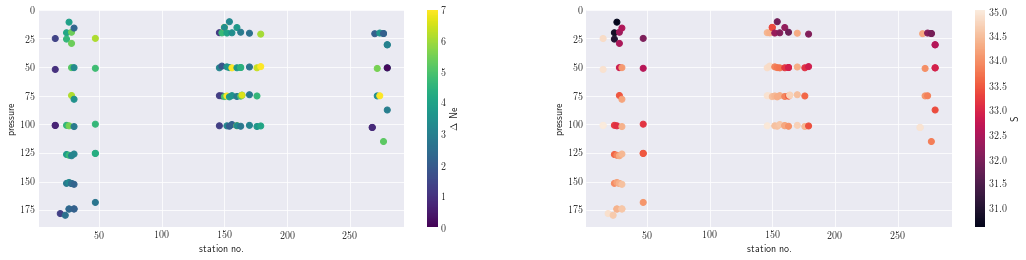

In [74]:
#plot depth del Ne
fig = plt.figure(figsize=(18,4))
ax = fig.add_subplot(121)
plt.scatter(data.index, data.pressure, c = data.delNe, cmap='viridis')
plt.ylim([190, 0])
plt.clim(0, 7)
plt.colorbar(label ='$\Delta$ Ne%')
plt.xlabel('station no.')
plt.ylabel('pressure')

ax = fig.add_subplot(122)
plt.scatter(data.index, data.pressure, c = data.salinity)
plt.ylim([190, 0])
plt.colorbar(label ='S')
plt.xlabel('station no.')
plt.ylabel('pressure')


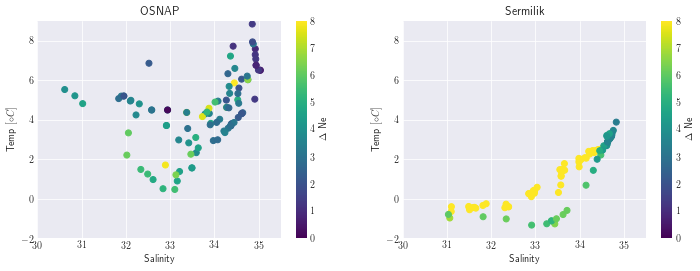

In [75]:
# plot TS and Ne
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
plt.scatter(data.salinity, data.temperature, c = data.delNe, cmap='viridis')
plt.colorbar(label ='$\Delta$ Ne%')
plt.xlabel('Salinity')
plt.ylabel('Temp $[\circ C]$')
plt.title('OSNAP')
plt.ylim([-2, 9])
plt.xlim([30, 35.5])
plt.clim(0, 8)

ax = fig.add_subplot(122)
plt.scatter(SERMdata.salinity, SERMdata.temperature, c = SERMdata.DelNe, cmap='viridis')
plt.colorbar(label ='$\Delta$ Ne%')
plt.xlabel('Salinity')
plt.ylabel('Temp $[\circ C]$')
plt.title('Sermilik')
plt.ylim([-2, 9])
plt.xlim([30, 35.5])
plt.clim(0, 8)

Text(0,0.5,'$^3$He [%]')

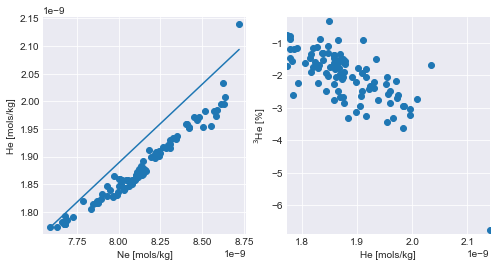

In [10]:
# plot the He/Ne and 3He/He ratios

ne_atm = np.array([ data.CNe.min(), data.CNe.max() ])
he_atm = ne_atm * 0.2857 + data.CHe.min()- 0.2857*ne_atm[0]


fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)

plt.plot(ne_atm, he_atm)
plt.scatter(data.CNe, data.CHe)
# plt.xlim([ data.CNe.min(), data.CNe.max() ])
# plt.ylim([ data.CHe.min(), data.CHe.max() ])

plt.margins(.02)
plt.xlabel('Ne [mols/kg]')
plt.ylabel('He [mols/kg]')

ax = fig.add_subplot(122)
plt.scatter( data.CHe, data.Del3He,)
plt.xlim([ data.CHe.min(), data.CHe.max() ])
plt.margins(.02)
plt.xlabel('He [mols/kg]')
plt.ylabel('$^3$He [%]')


Text(0,0.5,'$\\Delta$Xe [%]')

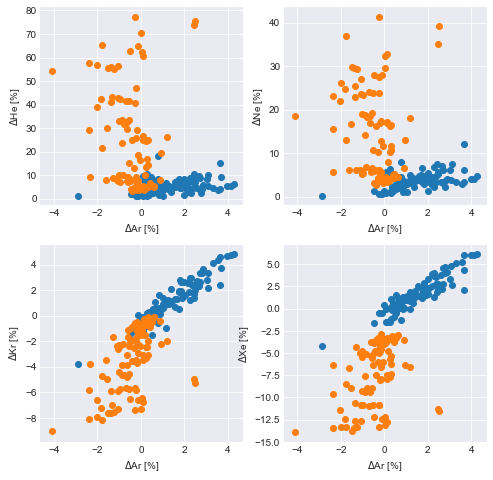

In [11]:
# plot saturation anomalies

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(221)
plt.scatter(data.delAr, data.delHe)
plt.scatter(SERMdata.DelAr, SERMdata.DelHe)
# plt.scatter(WGdata.DelAr, WGdata.DelHe)
# plt.xlim([ -4, 3])
# plt.ylim([ -5 , 15 ])
plt.xlabel('$\Delta$Ar [%]')
plt.ylabel('$\Delta$He [%]')

ax = fig.add_subplot(222)
plt.scatter(data.delAr, data.delNe)
plt.scatter(SERMdata.DelAr, SERMdata.DelNe)
# plt.xlim([ -6, 6])
# plt.ylim([ -5 , 15 ])
plt.xlabel('$\Delta$Ar [%]')
plt.ylabel('$\Delta$Ne [%]')

ax = fig.add_subplot(223)
plt.scatter(data.delAr, data.delKr)
plt.scatter(SERMdata.DelAr, SERMdata.DelKr)
# plt.xlim([ -6, 6])
# plt.ylim([ -5 , 6 ])
plt.xlabel('$\Delta$Ar [%]')
plt.ylabel('$\Delta$Kr [%]')

ax = fig.add_subplot(224)
plt.scatter(data.delAr, data.delXe)
plt.scatter(SERMdata.DelAr, SERMdata.DelXe)
# plt.xlim([ -6, 6])
# plt.ylim([ -5 , 10 ])
plt.xlabel('$\Delta$Ar [%]')
plt.ylabel('$\Delta$Xe [%]')


The Rhein et al 2018 method basically just says (I think):

$$He_{obs} = f_{ML}*He_{ML} + f_{smw}*He_{smw}$$

$$\Rightarrow f_{smw} = \frac{He_{obs} -f_{ML}*He_{ML}}{He_{smw}}$$

so

$$ f_{smw} = \frac{He_{obs}}{He_{smw}} -\frac{f_{ML}*He_{ML}}{He_{smw}}$$


just very very roughly, as a first look you might just ignore the ML stuff

$$ f_{smw} \approx \frac{ Ne_{obs}}{ Ne_{smw}} ,  f_{smw} \approx \frac{ He_{obs}}{ He_{smw}}$$

Note $$ Ne_{smw} = 88.7 nmol/kg (\Delta Ne_{smw} =940\%), He_{smw} =26.2 nmol/kg (\Delta He_{smw} =1400\%)$$. Need to look up those fractions. Check out Hohmann 2002 But this isn't a great idea, just a starting point


Text(0,0.5,'$ f_{smw} \\approx \\frac{ Ne_{obs}}{ Ne_{smw}} $')

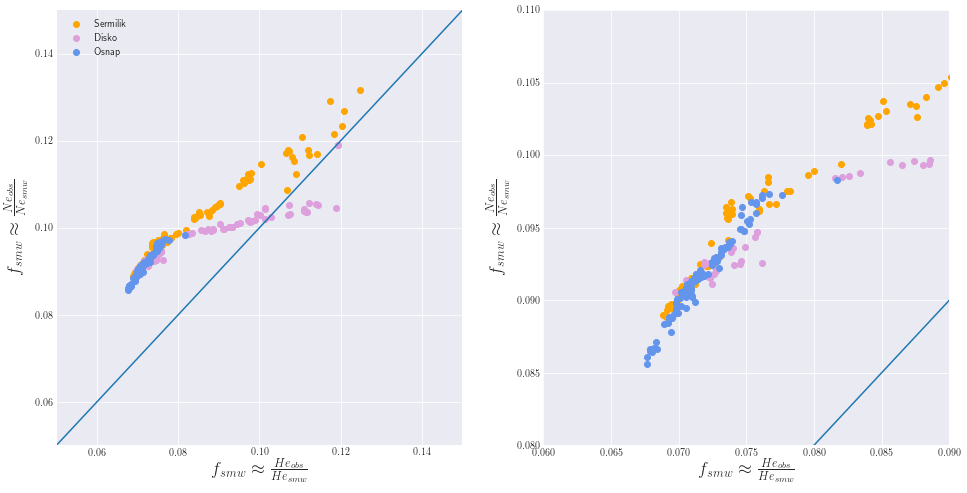

In [60]:

# this is in nmol/kg
Ne_smw = 88.7*10**-9
He_smw = 26.2*10**-9

OSNAP_Fne = data.CNe/Ne_smw
OSNAP_Fhe = data.CHe/He_smw

# need to convert data to nmol/kg
SERM_Fne = 0.044593*SERMdata.CNe/Ne_smw
SERM_Fhe = 0.044591*SERMdata.CHe/He_smw

# need to convert data to nmol/kg
WG_Fne = 0.044593*WGdata.CNe/Ne_smw
WG_Fhe = 0.044591*WGdata.CHe/He_smw

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)


plt.scatter(SERM_Fhe, SERM_Fne, color='orange')
plt.scatter(WG_Fhe, WG_Fne, color='plum')
plt.scatter(OSNAP_Fhe, OSNAP_Fne, color='cornflowerblue')
plt.legend(['Sermilik', 'Disko', 'Osnap'])


plt.plot([0, 0.15], [0, 0.15])
plt.rc('text', usetex=True)

plt.xlim([ .05, .15])
plt.ylim([ .05 , .15 ])
plt.xlabel(r'$ f_{smw} \approx \frac{ He_{obs}}{ He_{smw}} $', fontsize=18)
plt.ylabel(r'$ f_{smw} \approx \frac{ Ne_{obs}}{ Ne_{smw}} $', fontsize=18)
# plt.axis('equal')

ax = fig.add_subplot(122)


plt.scatter(SERM_Fhe, SERM_Fne, color='orange')
plt.scatter(WG_Fhe, WG_Fne, color='plum')
plt.scatter(OSNAP_Fhe, OSNAP_Fne, color='cornflowerblue')

plt.plot([0, 0.15], [0, 0.15])
plt.rc('text', usetex=True)

plt.xlim([ .06, .09])
plt.ylim([ .08, .11 ])
plt.xlabel(r'$ f_{smw} \approx \frac{ He_{obs}}{ He_{smw}} $', fontsize=18)
plt.ylabel(r'$ f_{smw} \approx \frac{ Ne_{obs}}{ Ne_{smw}} $', fontsize=18)



these can't really be this big. which is saying that the other term $$\frac{f_{ML}*He_{ML}}{He_{smw}}$$ is big.

Let's plot the supersaturations in the upper part of the water column

(190, 0)

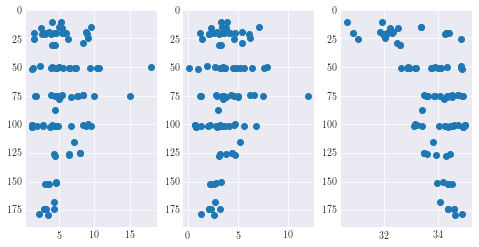

In [62]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(131)


plt.scatter(data.delHe, data.pressure)
plt.ylim([190, 0])

ax = fig.add_subplot(132)
plt.scatter(data.delNe, data.pressure)
plt.ylim([190, 0])

ax = fig.add_subplot(133)
plt.scatter(data.salinity, data.pressure)
plt.ylim([190, 0])